In [21]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
carros = pd.read_csv('/content/cars_dataset_numbers.csv', low_memory = False)
carros.head(3)

,index,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,Popularity,...,Crossover,Exotic,Factory Tuner,Hatchback,High-Performance,Hybrid,Luxury,Performance,City Preference,Highway Preference
0,0,0,335,6,1,2,2,1,4,3916,...,0,0,1,0,1,0,1,0,0,1
1,1,0,300,6,1,2,2,1,5,3916,...,0,0,0,0,0,0,1,1,0,1
2,2,0,300,6,1,2,2,1,4,3916,...,0,0,0,0,1,0,1,0,0,1


In [9]:
#df = pd.DataFrame(np.random.rand(500000,100))
#carros['distances'] = cosine_similarity(carros, carros.iloc[0:1]) # Here I assume that the parent vector is stored as the first row in the dataframe, but you could also store it separately

#n = 10 # or however many you want
#n_largest = carros['distances'].nlargest(n + 1) # this contains the parent itself as the most similar entry, hence n+1 to get n children

In [ ]:
#def get_bottom_k(corpus:list, k:int):
#    pairwise_similarity = make_similarity_matrix(corpus) # returns pairwise similarity matrix
#    sums = csr_matrix.sum(pairwise_similarity, axis=1)  # Similarity index for each item in corpus. Bigger > more
#    sums = np.squeeze(np.asarray(sums))
#    # similar to other txt.
#    indexes = np.argpartition(sums, k, axis=0)[:k] # Bottom k in terms of similarity (-k for top and [-k:])
#    return [corpus[i] for i in indexes]

In [16]:
# Selecionar apenas as colunas numéricas relevantes
colunas_usadas = ['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'Popularity', 'MSRP', 'Common', 'Crossover', 'Exotic', 'Factory Tuner', 'Hatchback', 'High-Performance', 'Hybrid', 'Luxury', 'Performance', 'City Preference', 'Highway Preference']
numeric_data = carros[colunas_usadas]

In [17]:
# Normalizar os dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

In [18]:
print(normalized_data)

[[-0.33491187  0.53186082  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]
 [-0.33491187  0.22579192  0.25772947 ...  1.99137752 -0.75108158
   0.75108158]
 [-0.33491187  0.22579192  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]
 ...
 [-0.33491187  0.22579192  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]
 [-0.33491187  0.22579192  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]
 [-0.33491187  0.22579192  0.25772947 ... -0.50216495 -0.75108158
   0.75108158]]


In [19]:
# Calcular a similaridade de cossenos
cosine_sim = cosine_similarity(normalized_data)

In [20]:
print(cosine_sim)

[[ 1.          0.43722862  0.70671297 ... -0.1092389  -0.10906789
  -0.10907801]
 [ 0.43722862  1.          0.63840057 ... -0.08759469 -0.08675936
  -0.0868021 ]
 [ 0.70671297  0.63840057  1.         ... -0.09695394 -0.09568515
  -0.09574952]
 ...
 [-0.1092389  -0.08759469 -0.09695394 ...  1.          0.99968238
   0.99971311]
 [-0.10906789 -0.08675936 -0.09568515 ...  0.99968238  1.
   0.99999922]
 [-0.10907801 -0.0868021  -0.09574952 ...  0.99971311  0.99999922
   1.        ]]


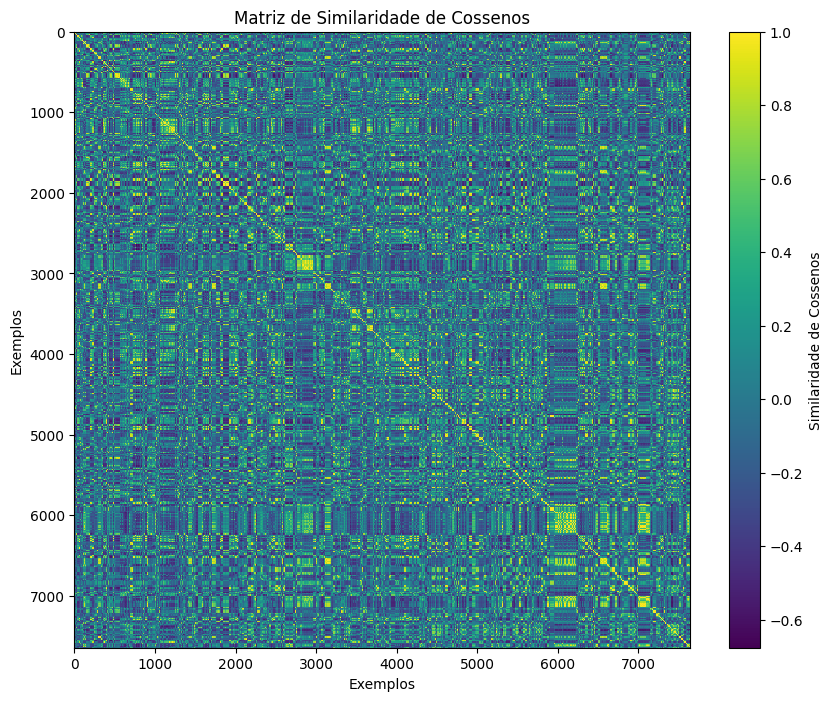

In [22]:
#visualização
plt.figure(figsize=(10, 8))
plt.imshow(cosine_sim, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similaridade de Cossenos')
plt.title('Matriz de Similaridade de Cossenos')
plt.xlabel('Exemplos')
plt.ylabel('Exemplos')
plt.show()